<a href="https://colab.research.google.com/github/GiuseppeELio/FRESCO-Board/blob/main/FRESCO_Tdrop_PCool_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code allows plotting the Data extracted from FRESCO (SD card) and to display the main panels for a Passive Raditive Cooling material(s) analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm
import glob

csvname = glob.glob('*.txt')[0] # from the SD card

df = pd.read_csv(csvname, header=0, index_col=0, skipinitialspace=True, parse_dates=True, dayfirst=True)
pd.to_datetime(df.index)
df.describe()

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD0,T0,PD3,T3,Tset1
count,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143848.000000,143848.000000,143848.000000,143848.000000,143848.000000,143848.000000,143848.000000
mean,20.985416,53.905484,21.787538,51.484544,22.353599,50.412532,19.313747,19.540801,21.213277,20.400975,23.749120,32.192519,198.796568,22.115157,-5.307784,53.343546,22.072921,46.327465,21.927298,20.984630
std,6.018456,13.034620,6.758594,17.002435,8.464135,9.814039,8.595441,8.636790,9.120229,8.623124,8.449858,6.738137,219.064638,8.002204,3.655624,46.701601,7.552671,40.250465,7.310784,6.019802
min,11.300000,30.300000,11.400000,22.900000,10.000000,33.400000,7.100000,6.890000,8.540000,7.820000,10.870000,21.750000,0.000000,9.990000,-12.150000,0.000000,10.940000,0.000000,10.370000,0.000000
25%,15.400000,42.800000,15.400000,36.900000,14.300000,40.600000,11.580000,11.880000,12.980000,12.580000,15.780000,26.690000,0.000000,14.810000,-8.630000,0.000000,15.100000,0.000000,15.170000,15.400000
50%,20.500000,53.600000,21.200000,49.500000,20.600000,50.800000,16.880000,16.880000,18.480000,17.980000,22.300000,30.500000,62.100000,20.390000,-5.150000,64.370000,20.780000,56.670000,20.770000,20.500000
75%,26.700000,65.000000,27.900000,66.400000,30.000000,59.500000,27.230000,27.540000,29.660000,28.380000,31.820000,36.940000,442.270000,29.710000,-2.310000,94.820000,28.390000,79.660000,28.292500,26.700000
max,31.900000,78.000000,34.200000,84.200000,37.400000,67.100000,35.740000,35.850000,38.310000,36.890000,38.780000,51.560000,608.090000,37.750000,8.750000,221.080000,37.010000,347.430000,35.970000,31.900000


In [2]:
def export_figure(fig, fname, dpi=120, transparent=False):
    """Save figure as PNG or SVG with optional transparency"""
    fig.set_size_inches(16, 12)
    if transparent:
        # For PNG format with transparency
        if fname.endswith('.png'):
            fig.savefig(fname, bbox_inches='tight', dpi=dpi, transparent=True)
            # Convert PNG to RGBA and save again to preserve transparency
            im = Image.open(fname)
            im2 = im.convert('RGBA')
            im2.save(fname, format='PNG')
        # For SVG format with transparency
        elif fname.endswith('.svg'):
            fig.savefig(fname, bbox_inches='tight', dpi=dpi, transparent=True)
    else:
        fig.savefig(fname, bbox_inches='tight', dpi=dpi)

The following lines allows rolling every a certain time (e.g. 1 hour) the entire dataset and in case save the new dataset as csv.

In [3]:
rw = '1H'
dfroll = df.rolling(window=rw).mean()
pd.set_option('plotting.backend', 'matplotlib')
dfroll.describe()
#dfroll.to_csv(csvname[:-4] + f'_rw{rw}.csv', decimal=',', sep=';', float_format='%.3f')

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD0,T0,PD3,T3,Tset1
count,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000,143849.000000
mean,21.025901,53.791193,21.833722,51.360669,22.434947,50.313281,19.403862,19.633636,21.307557,20.491712,23.840710,32.193443,201.742471,22.190200,-5.257647,52.683516,22.136686,45.755460,21.992778,21.020215
std,5.989593,12.968769,6.727777,16.930635,8.430621,9.800569,8.552925,8.598528,9.076494,8.583321,8.400234,6.624105,217.539835,7.952864,3.552733,44.431473,7.519910,37.619920,7.283745,5.989955
min,11.440968,31.165614,11.447158,23.827001,10.071244,33.818884,7.437845,7.551885,8.783089,8.279240,11.328801,23.428711,0.000000,10.417901,-10.956502,0.000000,11.181835,0.000000,11.213331,0.000000
25%,15.350985,42.790197,15.415973,36.706535,14.415315,40.465579,11.639949,11.894541,12.993940,12.728423,15.751292,26.629618,0.000000,14.725309,-8.450461,0.000000,15.105157,0.000000,15.141305,15.352475
50%,20.742889,52.969218,21.388520,48.648618,20.833071,50.618510,17.108032,17.224544,18.697992,18.258616,22.628407,30.629994,83.936665,20.530993,-5.014825,68.188398,20.906191,56.999392,20.895514,20.738245
75%,26.594147,64.935694,27.741070,66.644576,30.116273,59.520393,27.022740,27.596149,29.552072,28.453874,31.864375,37.156062,443.377514,29.605211,-2.224377,90.402440,28.447033,77.913747,28.249521,26.594032
max,31.571477,77.035791,33.901578,82.050197,36.951184,66.415541,35.153832,35.559420,37.399133,36.358451,37.752468,48.444904,552.368170,36.089448,5.070000,135.081487,36.349449,111.977448,35.697527,31.572492


In [4]:
# the differences between the sample and the ambient temperature measured using the sensor related to the  TA1 data collection
dfroll['ΔT1'] = dfroll['TS1'] - dfroll['TA1']
dfroll['ΔT2'] = dfroll['TS2'] - dfroll['TA1']
dfroll['ΔT3'] = dfroll['TS3'] - dfroll['TA1']
dfroll['ΔT4'] = dfroll['TS4'] - dfroll['TA1']
dfroll['ΔTbx'] = dfroll['Tbx'] - dfroll['TA1']

#If need for example you can do the same considering another temperature measured inside the sample box holder (e.g. TA3)
#dfroll['ΔT1_box'] = dfroll['TS1'] - dfroll['TA3']
#dfroll['ΔT2_box'] = dfroll['TS2'] - dfroll['TA3']
#dfroll['ΔT3_box'] = dfroll['TS3'] - dfroll['TA3']
#dfroll['ΔT4_box'] = dfroll['TS4'] - dfroll['TA3']
#dfroll['ΔTbx_box'] = dfroll['TS4'] - dfroll['Tbx']

#And then consider the differce between two possible "relative ambient temperatures"
#dfroll['ΔT_box'] = dfroll['TA3'] - dfroll['TA1']

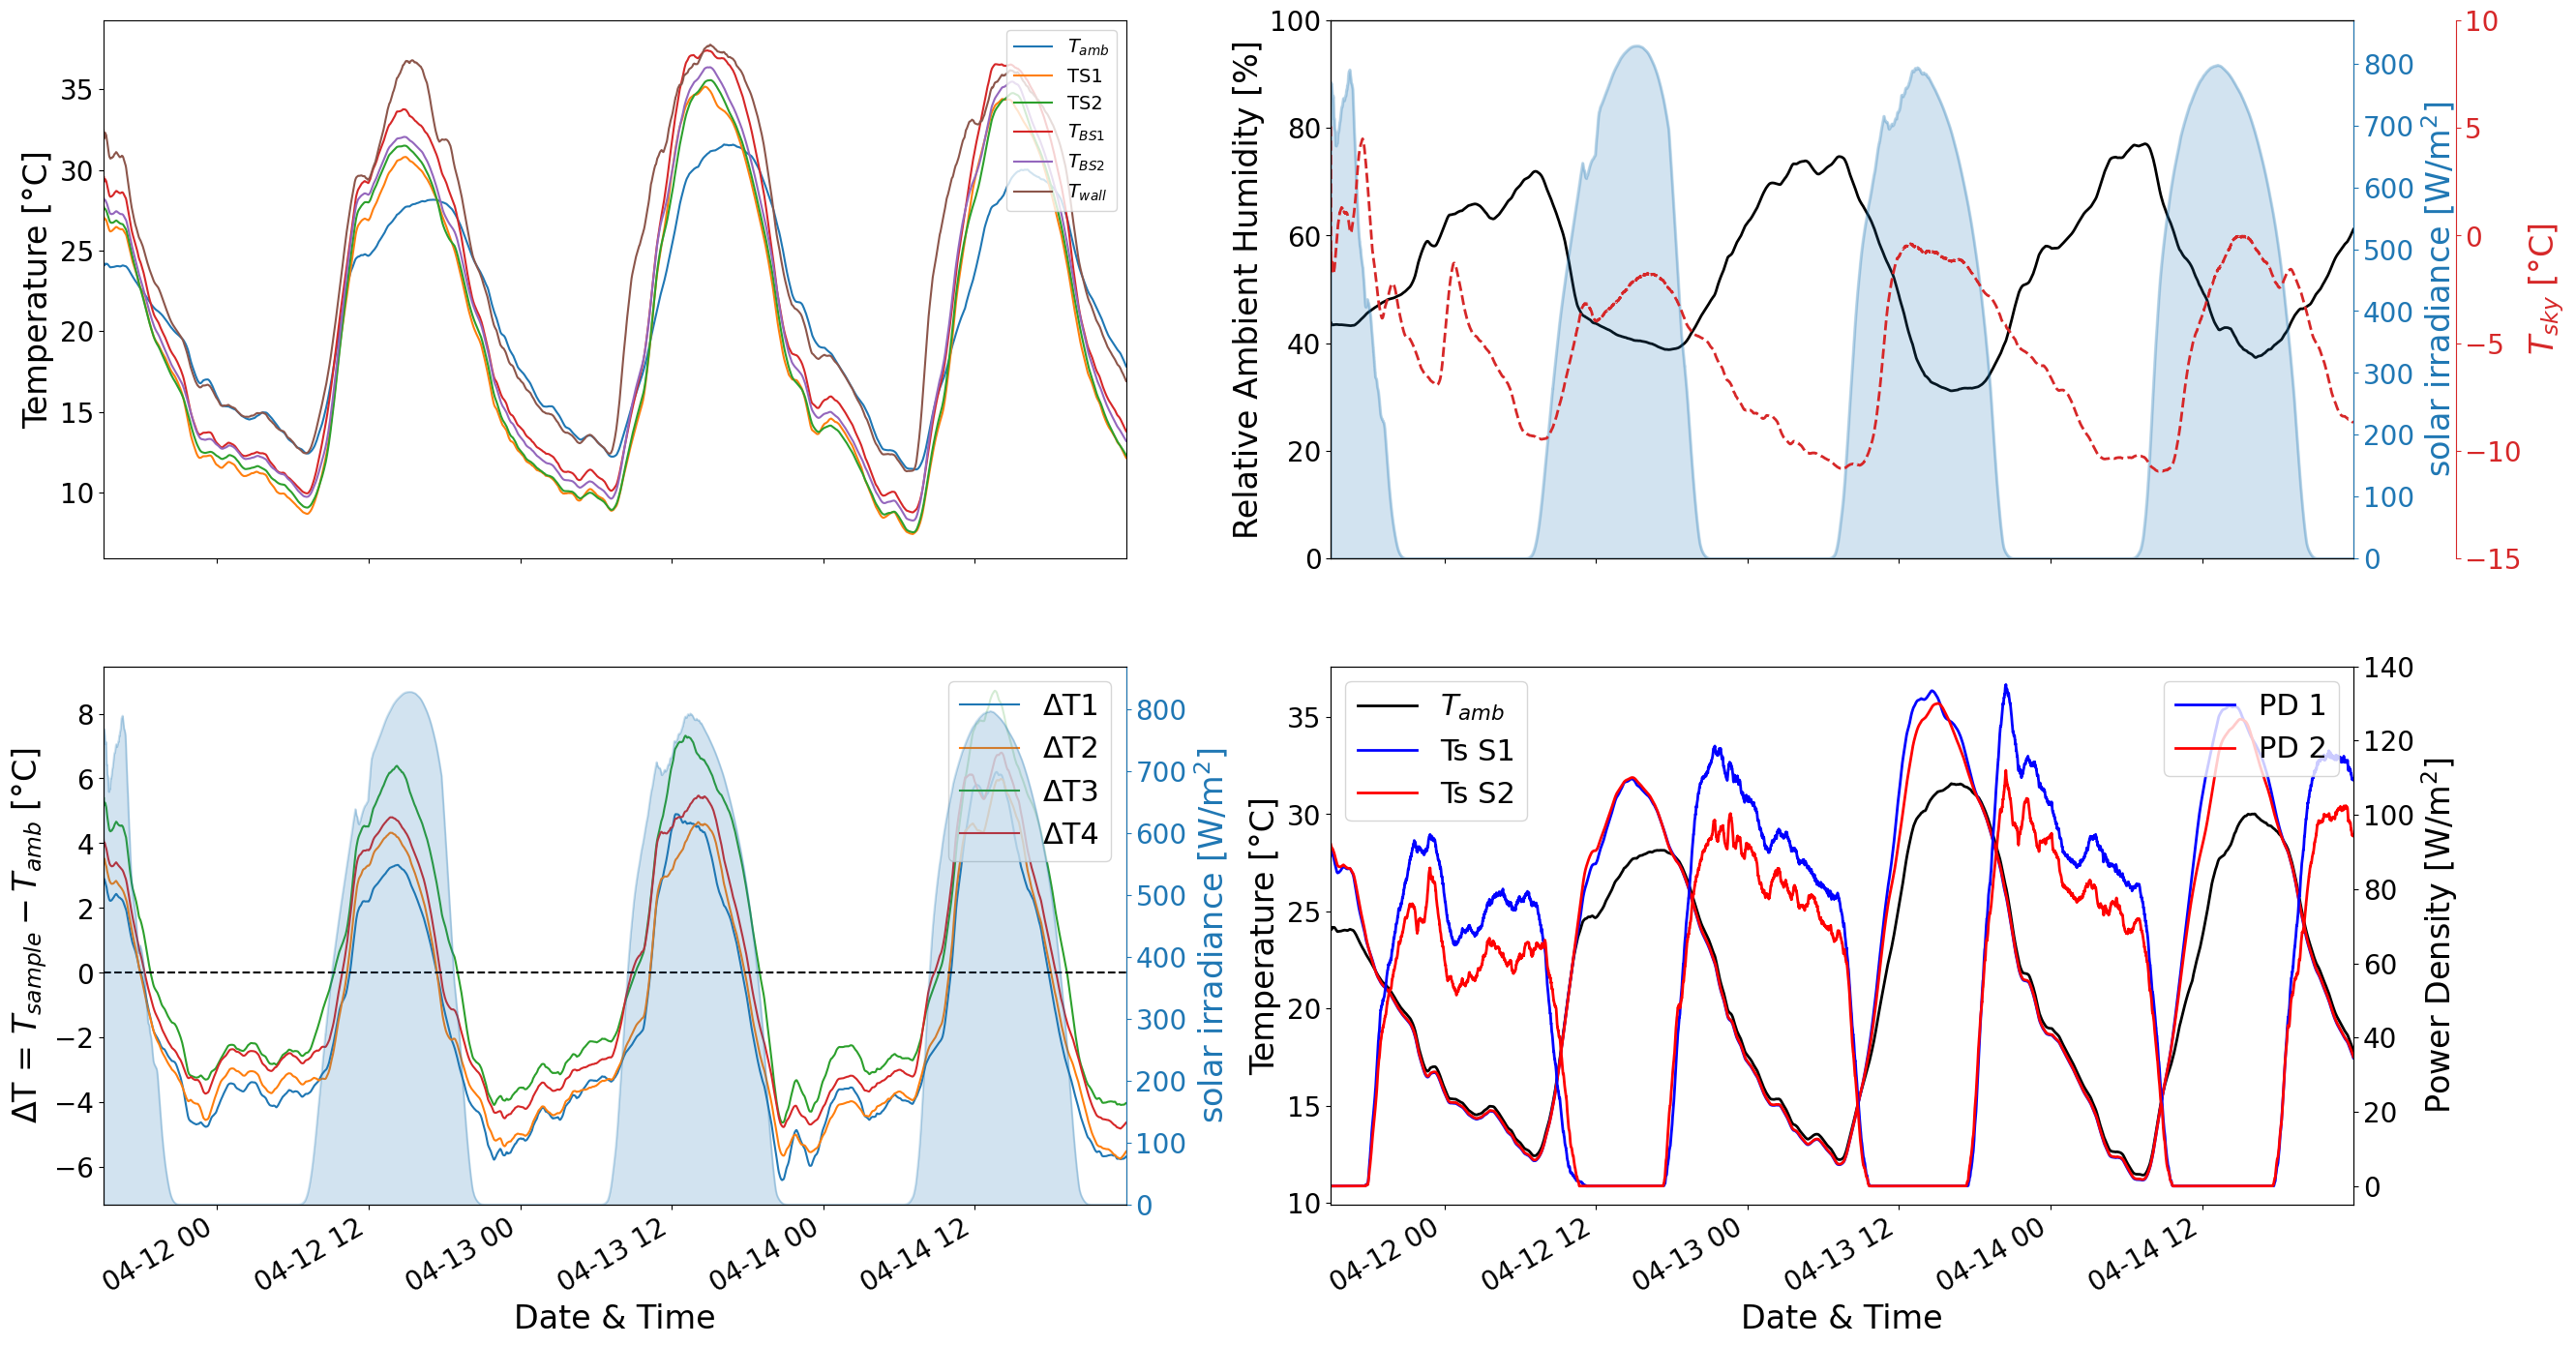

In [12]:
import matplotlib.pyplot as plt
fontsize = 24
fontax = fontsize
fontlab = fontsize - 2
# If needed you can adjust some value such as the irradiance if you system results not well alligned with a weather station
dfroll['Irm'] = dfroll['Ir'] * 1.5

fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(30,18))
#First Plot
dfroll.plot(ax=axarr[0, 0], y=['TA1', 'TS1', 'TS2', 'TS3', 'TS4', 'Tbx'])
axarr[0, 0].legend(['$T_{amb}$', 'TS1', 'TS2', '$T_{BS1}$', '$T_{BS2}$', '$T_{wall}$'], fontsize=fontsize-10, loc='upper right', ncol=1)
axarr[0, 0].set_ylabel('Temperature [°C]', fontsize=fontsize)

#Second Plot
ax_irr = axarr[0, 1].twinx()
dfroll.plot(ax=axarr[0, 1], y=['H1'], ylim=(0, 100), linewidth=2.0, legend=False, color=['black'])
axarr[1, 1].set_xlabel('Date & Time')

dfroll.plot.area(ax=ax_irr, y='Irm', alpha=0.2, legend=False, linewidth=2.0)
ax_irr.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4', fontsize=fontax)
ax_irr.spines['right'].set_color('#1f77b4')
ax_irr.tick_params(axis='y', colors='#1f77b4')
axarr[0, 1].set_ylabel('Temperature [°C]', fontsize=fontax)
axarr[0, 1].set_ylabel('Relative Ambient Humidity [%]', fontsize=fontax)

ax_sky = axarr[0, 1].twinx()
dfroll.plot(ax=ax_sky, y='TSIR', ylim=(-15, 10), color='#d62728', legend=False, linewidth=2.0, linestyle='--')
ax_sky.set_ylabel('$T_{sky}$ [°C]', color='#d62728', fontsize=fontax)
ax_sky.spines['right'].set_color('#d62728')
ax_sky.spines['right'].set_position(("axes", 1.1))
ax_sky.tick_params(axis='y', colors='#d62728')

#Third Plot
ax_dif = axarr[1, 0].twinx()
dfroll.plot(ax=axarr[1, 0], y=['ΔT1', 'ΔT2','ΔT3','ΔT4'])
dfroll.plot.area(ax=ax_dif, y='Irm', alpha=0.2, legend=False)
axarr[1, 0].axhline(0, ls='--', c='k')
axarr[1, 0].set_ylabel('ΔT = $T_{sample} - T_{amb}$ [°C]', fontsize=fontax)
ax_dif.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4', fontsize = fontax)
axarr[1, 0].set_xlabel('Date & Time', fontsize=fontax)
axarr[1, 0].legend(['ΔT1', 'ΔT2','ΔT3','ΔT4'], fontsize=fontlab, loc='upper right')
ax_dif.spines['right'].set_color('#1f77b4')
ax_dif.tick_params(axis='y', colors='#1f77b4')

#Fourth Plot
dfroll.plot(ax=axarr[1, 1], y=['TA1', 'T0', 'T3'], linewidth=2.0, color=['black', 'blue', 'red'])
axarr[1, 1].set_ylabel('Temperature [°C]', fontsize=fontax)

ax_pow = axarr[1, 1].twinx()
dfroll.plot(ax=ax_pow, y=['PD0', 'PD3'], linewidth=2.0, color=['blue', 'red'])
plt.ylim(-5, 140)
axarr[1, 1].legend(['$P_1$', '$P_2$'], fontsize=fontlab)
axarr[1, 1].set_xlabel('Date & Time', fontsize=fontax)
ax_pow.set_ylabel('Power Density [W/m$^2$]', fontsize=fontax)

axarr[1, 1].legend(['$T_{amb}$', 'Ts S1', 'Ts S2'], fontsize=fontlab, loc='upper left')
ax_pow.legend(['PD 1', 'PD 2'], fontsize=fontlab, loc='upper right')

# Increase font size for tick labels
for ax_row in axarr:
    for ax in ax_row:
        ax.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_sky.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_irr.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_dif.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_pow.tick_params(axis='both', which='major', labelsize=fontsize-4)

_ = [axh.autoscale(enable=True, axis='x', tight=True) for axh_row in axarr for axh in axh_row]



#export_figure(fig, csvname[:-4] + '_Tdrop_PCool.png')
# Save the figure as SVG
#export_figure(fig, csvname[:-4] + 'Tdrop_PCool.svg', transparent=True)